In [77]:
import pandas as pd

In [78]:
dataset = pd.read_csv('/content/drive/MyDrive/Updated Cw data')

In [79]:
dataset.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,1,T1,N1,IIA,Poorly differentiated,3,Regional,4,1,1,24,1,60,Alive
1,50,1,T2,N2,IIIA,Moderately differentiated,2,Regional,35,1,1,14,5,62,Alive
2,58,1,T3,N3,IIIC,Moderately differentiated,2,Regional,63,1,1,14,7,75,Alive
3,58,1,T1,N1,IIA,Poorly differentiated,3,Regional,18,1,1,2,1,84,Alive
4,47,1,T2,N1,IIB,Poorly differentiated,3,Regional,41,1,1,3,1,50,Alive


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3204 non-null   int64 
 1   Sex                     3204 non-null   int64 
 2   T_Stage                 3204 non-null   object
 3   N_Stage                 3204 non-null   object
 4   6th_Stage               3204 non-null   object
 5   Differentiated          3204 non-null   object
 6   Grade                   3204 non-null   int64 
 7   A_Stage                 3204 non-null   object
 8   Tumor_Size              3204 non-null   int64 
 9   Estrogen_Status         3204 non-null   int64 
 10  Progesterone_Status     3204 non-null   int64 
 11  Regional_Node_Examined  3204 non-null   int64 
 12  Reginol_Node_Positive   3204 non-null   int64 
 13  Survival_Months         3204 non-null   int64 
 14  Mortality_Status        3204 non-null   object
dtypes: i

In [109]:
# Encode 'Differentiated' and 'Grade' as well
label_encoder = {}  # Initialize label_encoder as a dictionary
for col in ['Differentiated', 'Grade']:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoder[col] = le # Store the LabelEncoder object for the column

In [111]:
# Convert to strings, strip spaces, and uppercase
y_train = y_train.astype(str).str.upper().str.strip()
y_test = y_test.astype(str).str.upper().str.strip()

# Check unique values
print(y_train.unique())
print(y_test.unique())


['ALIVE' 'DEAD']
['ALIVE' 'DEAD']


In [112]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the data
X_encoded = X.copy()

# Identify categorical columns
categorical_cols = X_encoded.select_dtypes(include='object').columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])


In [113]:
# Define the input features
feature_cols = [
    'Age', 'Sex', 'T_Stage','N_Stage', '6th_Stage', 'Differentiated',
    'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
    'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive',
    'Mortality_Status'
]

# Input features and target variable
X = dataset[feature_cols]   # Features
y = dataset['Mortality_Status']  # Target


In [114]:
from sklearn.model_selection import train_test_split

# Split the encoded dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the ensemble
ensemble_learner.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [115]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [116]:
base_learners = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier())
]

# Create Voting Classifier
ensemble_learner = VotingClassifier(estimators=base_learners, voting='soft')

In [117]:
ensemble_learner.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [118]:
y_pred_ensemble_learner = ensemble_learner.predict(X_test)


In [119]:
from sklearn.metrics import accuracy_score

ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)

print("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)


The voting ensemble classifier accuracy is:  0.9516380655226209


Text(0.5, 1.0, 'Ensemble Learner Confusion Matrix')

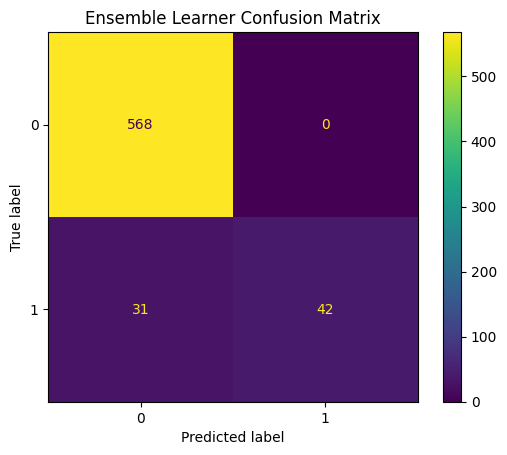

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner,
                                            labels=ensemble_learner.classes_)

ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test,
                                               display_labels=ensemble_learner.classes_)

ensemble_learner_disp.plot()

ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")


In [121]:
from sklearn.metrics import classification_report

print("Ensemble Learner Classification Report \n", classification_report(y_test, y_pred_ensemble_learner))


Ensemble Learner Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       568
           1       1.00      0.58      0.73        73

    accuracy                           0.95       641
   macro avg       0.97      0.79      0.85       641
weighted avg       0.95      0.95      0.95       641



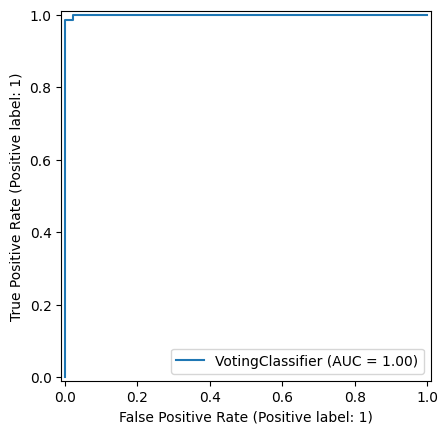

In [122]:
from sklearn.metrics import RocCurveDisplay

ensemble_learner = RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)


In [123]:
from sklearn.tree import DecisionTreeRegressor


In [126]:
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [127]:
y_pred = DT_regressor.predict(X_test)

In [129]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 0.0
MSE: 0.0
R2: 1.0


In [130]:
from sklearn import tree
from matplotlib import pyplot as plt

In [131]:
Tree_figure = plt.figure(figsize=(200,200))
DT_Graph = tree.plot_tree(DT_regressor, feature_names=list(X_train.columns), filled=True)

In [132]:
Tree_figure.savefig("decistion_tree.svg")

In [134]:
DT_regressor = DecisionTreeRegressor(max_depth=5)
DT_regressor.fit(X_train, y_train)
y_pred = DT_regressor.predict(X_test)